# Repeat Former Analysis in Logarithmic Scale

In earlier analysis, we found that QPESUMS data is coded with UTC instead of LST, and hence we created new dataset with corrected time-stamp (LST), and repeated the analysis related to time (mostly filtered subset of data).

### Explained Variance

First we look at the explained variance (as ratio) of the first 100 PCs. 

         full      fp01      fp05      fp10      fp20      fp40      ftyw
pc1  0.302547  0.317812  0.328536  0.346935  0.365000  0.416364  0.429123
pc2  0.086230  0.094287  0.095499  0.086736  0.077191  0.060634  0.097847
pc3  0.047466  0.045472  0.047118  0.046200  0.048229  0.050064  0.052559
pc4  0.035005  0.037679  0.038837  0.041524  0.044643  0.046906  0.026581
pc5  0.022224  0.022958  0.021855  0.022851  0.024378  0.028479  0.018365


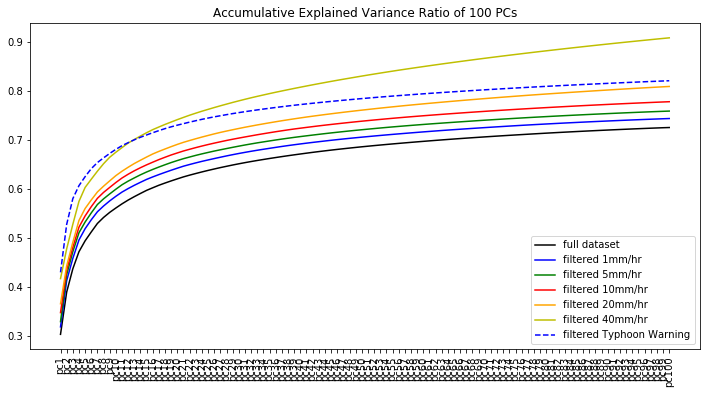

In [1]:
# Read processed data and show the explained variance ratio
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

expvar = pd.read_csv('data/expvar_ln.csv', index_col=0)
print(expvar.head())

# Making plot
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(expvar.full), 'k', label='full dataset')
plt.plot(np.cumsum(expvar.fp01), 'b', label='filtered 1mm/hr')
plt.plot(np.cumsum(expvar.fp05), 'g', label='filtered 5mm/hr')
plt.plot(np.cumsum(expvar.fp10), 'r', label='filtered 10mm/hr')
plt.plot(np.cumsum(expvar.fp20), 'orange', label='filtered 20mm/hr')
plt.plot(np.cumsum(expvar.fp40), 'y', label='filtered 40mm/hr')
plt.plot(np.cumsum(expvar.ftyw), 'b--', label='filtered Typhoon Warning')
plt.xticks(rotation=90)
plt.title('Accumulative Explained Variance Ratio of 100 PCs')
plt.legend()
plt.show()

As shown in the figure above, when we applied filters to reduce the sample size, the explained variance ratio of the first few PCs increased. This should be reasonable since after filtering the data will be more homogeneous and then the variation will be reduced. Hence, fewer PCs can represent more variation in the dataset.

The size of the datasets that used to perform PCA:

|dataset|number of records|
|-------|-----------------|
|Full|34369|
|1mm/hr|11260|
|5mm/hr|4456|
|10mm/hr|2150|
|20mm/hr|858|
|40mm/hr|236|
|Typhoon warning|1517|


## PC1

We also want to know if there is difference between PCs derived from different datasets. First we recall a tool for illustrating the `6 x 275 x 162` numpy array. 

In [2]:
# Utility to plot a 6*275*162 numpy array
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from mpl_toolkits.basemap import Basemap

lat0 = 21.8875
lat1 = 25.3125
lon0 = 120.0
lon1 = 122.0125

lats = np.arange(21.8875, 25.3125, 0.0125)
lons = np.arange(120.0, 122.0125, 0.0125)

def plot_dbz_6maps(data):
    import matplotlib.pyplot as plt
    # Get data dimensions
    ny, nx, nl = data.shape
    print('Data dimensions: ' + str(nl) + ' layers of ' + str(ny) + ' x ' + str(nx))
    # Making plot
    for i in range(nl):
        ax = plt.subplot(2, nl/2, i+1)
        # create basemap
        m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
        # draw coastlines on map.
        m.drawcoastlines()
        m.imshow(data[:,:,i], alpha=0.99, cmap='Greys')#, vmin=0., vmax=60.)
        m.colorbar()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()
    return(0)

### Data Processing

The PCA model of 100 PCs is roughly 200MB on disk, so we fisrt take out only the first 5 PCs for faster processing.

### Making plot of PC1

Full Dataset (34369 records)
Data dimensions: 6 layers of 275 x 162


C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


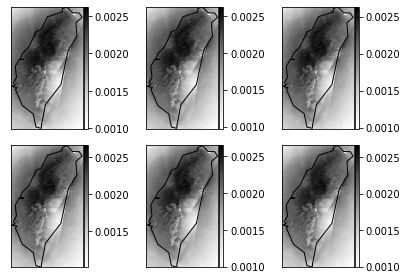

Data with Precipitation >= 1mm (11260 records)
Data dimensions: 6 layers of 275 x 162


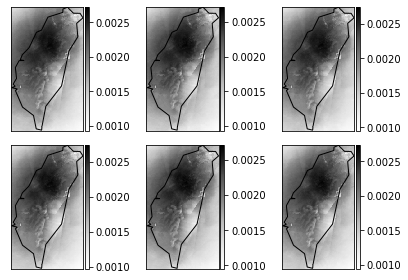

Data with Precipitation >= 5mm (4456 records)
Data dimensions: 6 layers of 275 x 162


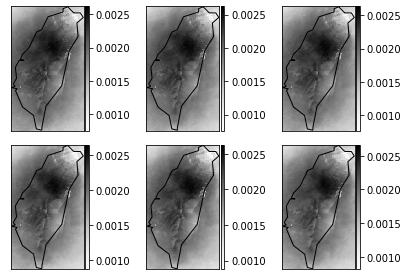

Data with Precipitation >= 10mm (2150 records)
Data dimensions: 6 layers of 275 x 162


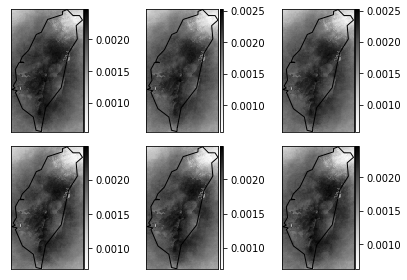

Data with Precipitation >= 20mm (858 records)
Data dimensions: 6 layers of 275 x 162


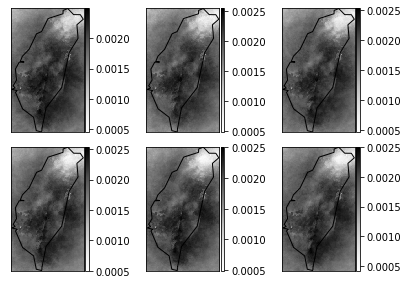

Data with Precipitation >= 40mm (236 records)
Data dimensions: 6 layers of 275 x 162


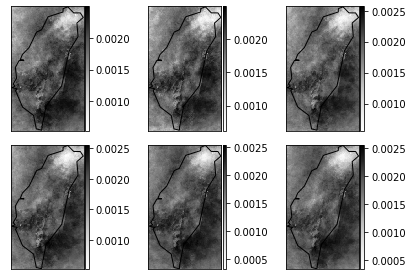

Data with Typhoon Warnings (by CWB, 1517 records)
Data dimensions: 6 layers of 275 x 162


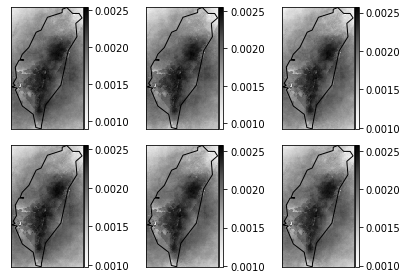

0

In [3]:
# Full Dataset (34369 records)
print("Full Dataset (34369 records)")
pc5 = np.load('data/ln_full_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)
# Data with Precipitation >= 1mm (11260 records)
print("Data with Precipitation >= 1mm (11260 records)")
pc5 = np.load('data/ln_fp01_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)
# Data with Precipitation >= 5mm (4456 records)
print("Data with Precipitation >= 5mm (4456 records)")
pc5 = np.load('data/ln_fp05_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)
# Data with Precipitation >= 10mm (2150 records)
print("Data with Precipitation >= 10mm (2150 records)")
pc5 = np.load('data/ln_fp10_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)
# Data with Precipitation >= 20mm (858 records)
print("Data with Precipitation >= 20mm (858 records)")
pc5 = np.load('data/ln_fp20_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)
# Data with Precipitation >= 40mm (236 records)
print("Data with Precipitation >= 40mm (236 records)")
pc5 = np.load('data/ln_fp40_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)
# Data with Typhoon Warnings (by CWB, 1517 records)
print("Data with Typhoon Warnings (by CWB, 1517 records)")
pc5 = np.load('data/ln_ftyw_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(275, 162, 6)
plot_dbz_6maps(d)

### Quick Summary

Comparing to the former results, the difference in PC1 between subsets seems more obvious: while the PC1 of all records shows strong variations along the north and west side of the Central Mountain Range, PC1 from heavier rain show more variation on the top and the south and east side of the CMR. Also in HR cases, we can see low variation in Taipei area.


## Precipitations in the PC-Space

Next, let's have a look at the relationship between the PCs and the maximal precipitation.

    timestamp  prec
0  2013010101   0.0
1  2013010102   0.0
2  2013010103   0.0
3  2013010104   0.0
4  2013010105   0.0
Full Dataset (34369 records)


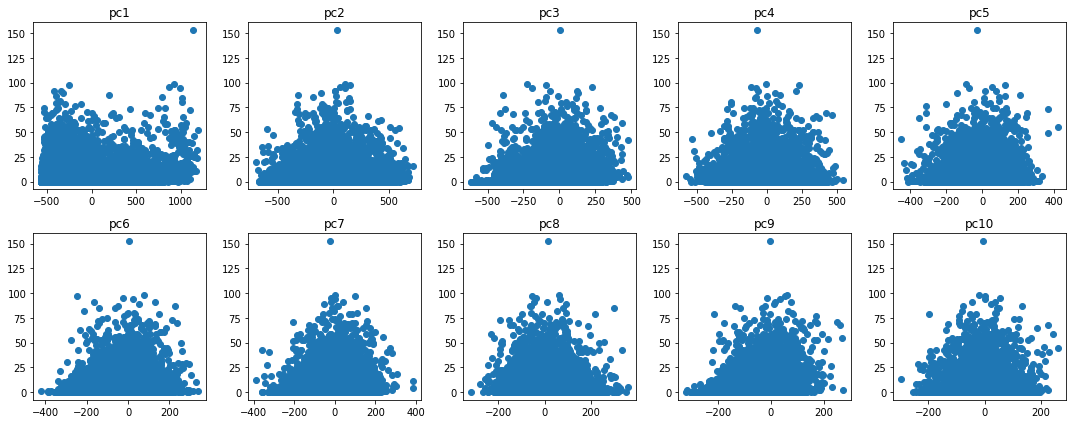

Data with Precipitation >= 40mm (236 records)


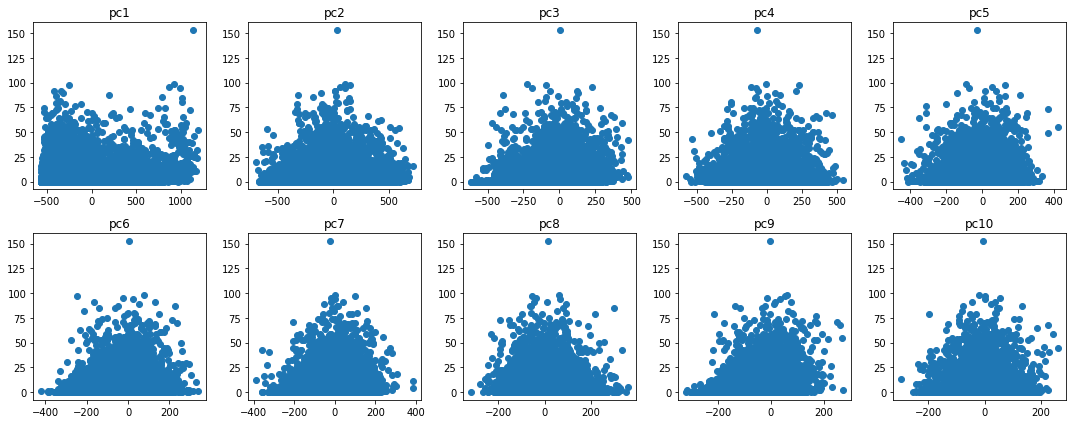

Data with Typhoon Warnings (by CWB, 1517 records)


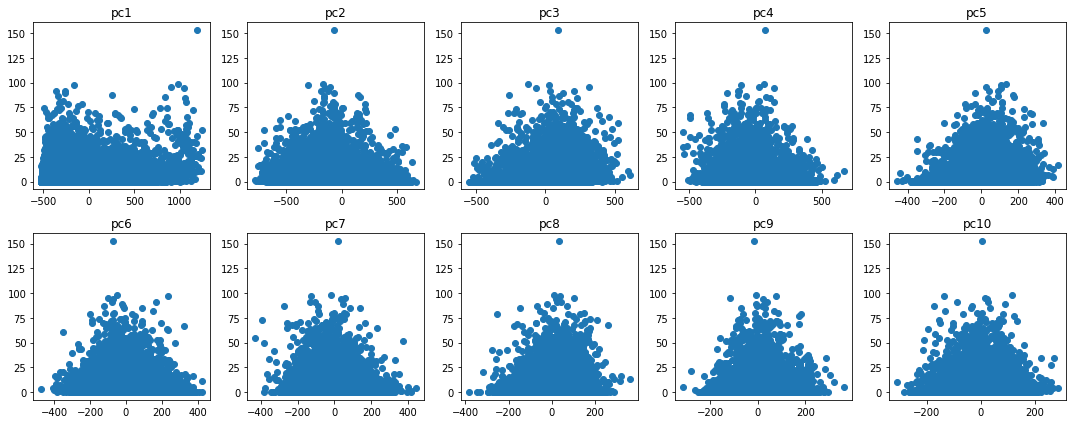

0

In [4]:
# Load precipitation data
import numpy as np
import pandas as pd
# Read precipitation data
tmp = pd.read_csv('./data/t1hr.csv')
# Calculate maximal precipitation among 45 stations
dates = tmp['date']
t1hr = tmp.iloc[:,1:]
t1hr_max = pd.DataFrame({'timestamp':dates, 'prec':t1hr.max(axis=1)})
# Test
print(t1hr_max.head())

# Visualization script
%matplotlib inline
import matplotlib.pyplot as plt

def show_prec_on_pc(prec, pcfile, nl=10):
    # Read projections on PCs
    pcs = pd.read_csv(pcfile)
    # Merge two dataframes
    tmp = pd.merge(prec, pcs, on='timestamp')
    # Making plots
    for i in range(nl):
        ax = plt.subplot(2, nl/2, i+1)
        ax.scatter(tmp.iloc[:,i+2],tmp['prec'])
        ax.set_title(tmp.columns[i+2])
    plt.tight_layout()
    plt.show()
    return(0)

# Making plots
# Full Dataset (34369 records)
print("Full Dataset (34369 records)")
plt.figure(figsize=(15,6))
show_prec_on_pc(t1hr_max, '../ws.flt/proj_ln_full.csv')
# Data with Precipitation >= 40mm (236 records)
print("Data with Precipitation >= 40mm (236 records)")
plt.figure(figsize=(15,6))
show_prec_on_pc(t1hr_max, '../ws.flt/proj_ln_fp40.csv')
# Data with Typhoon Warnings (by CWB, 1517 records)
print("Data with Typhoon Warnings (by CWB, 1517 records)")
plt.figure(figsize=(15,6))
show_prec_on_pc(t1hr_max, '../ws.flt/proj_ln_ftyw.csv')

### Quick Summary

The relationship still looks like log-normal or quadratic linear.

### Quadratic Linear Space

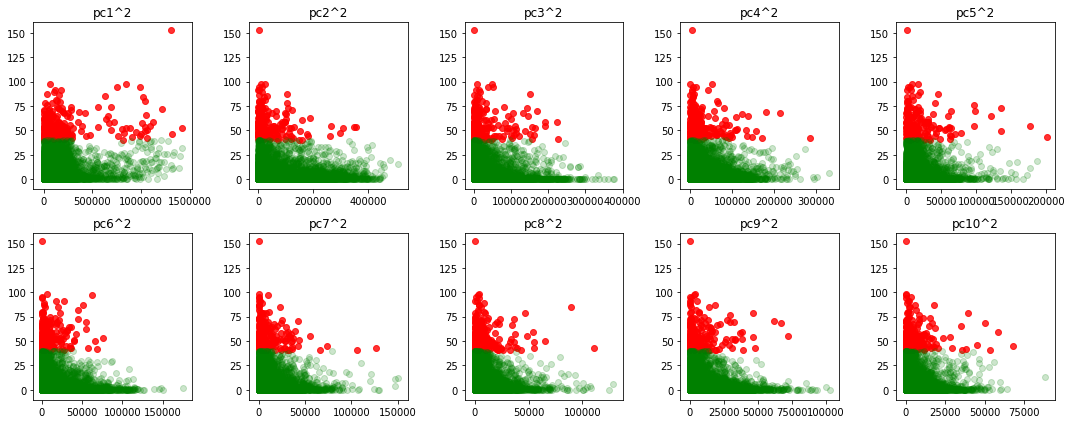

In [5]:
import numpy as np
import pandas as pd

prec = t1hr_max
# Read projections on PCs
pcs = pd.read_csv('../ws.flt/proj_ln_full.csv')
# Merge two dataframes
tmp = pd.merge(prec, pcs, on='timestamp')

# Making plots
plt.figure(figsize=(15,6))
tmp['hr'] = (tmp['prec']>40.)
dhr1 = tmp.loc[tmp['hr'],:]
dhr0 = tmp.loc[~tmp['hr'],:]
for i in range(10):
    ax = plt.subplot(2, 10/2, i+1)
    ax.scatter(dhr1.iloc[:,i+2]*dhr1.iloc[:,i+2],dhr1['prec'], c='r', alpha=0.8)
    ax.scatter(dhr0.iloc[:,i+2]*dhr0.iloc[:,i+2],dhr0['prec'], c='g', alpha=0.2)
    ax.set_title(tmp.columns[i+2]+'^2')
plt.tight_layout()
plt.show()

## GLM with Feature Selection

### Input data processing

In [6]:
import numpy as np
import pandas as pd

# Read precipitation data
tmp = pd.read_csv('./data/t1hr.csv')
# Calculate maximal precipitation among 45 stations
dates = tmp['date']
t1hr = tmp.iloc[:,1:]
t1hr_max = pd.DataFrame({'timestamp':dates, 'prec':t1hr.max(axis=1)})

# Read projections
pfull = pd.read_csv('../ws.flt/proj_ln_full.csv')
pfp40 = pd.read_csv('../ws.flt/proj_ln_fp40.csv')
pftyw = pd.read_csv('../ws.flt/proj_ln_ftyw.csv')

# Create new column names
pfull.columns = ['full_'+i for i in pfull.columns]
pfp40.columns = ['fp40_'+i for i in pfp40.columns]
pftyw.columns = ['ftyw_'+i for i in pftyw.columns]
pfull.rename(columns={'full_timestamp':'timestamp'}, inplace=True)
pfp40.rename(columns={'fp40_timestamp':'timestamp'}, inplace=True)
pftyw.rename(columns={'ftyw_timestamp':'timestamp'}, inplace=True)
#print(list(pfull.columns))
#print(list(pfp40.columns))
#print(list(pftyw.columns))

# Clean up
data = pd.merge(pd.merge(pfull.iloc[:,:11], pfp40.iloc[:,:11], on='timestamp'),pftyw.iloc[:,:11], on='timestamp')
data.index = list(data['timestamp'])
data = data.iloc[:,1:]

# Add logarithm
for i in range(data.shape[1]):
    data['squared_'+list(data.columns)[i]] = data.iloc[:,i]**2

# Check
print("Input data shape:")
print(data.shape)
print(list(data.columns))

Input data shape:
(34400, 60)
['full_pc1', 'full_pc2', 'full_pc3', 'full_pc4', 'full_pc5', 'full_pc6', 'full_pc7', 'full_pc8', 'full_pc9', 'full_pc10', 'fp40_pc1', 'fp40_pc2', 'fp40_pc3', 'fp40_pc4', 'fp40_pc5', 'fp40_pc6', 'fp40_pc7', 'fp40_pc8', 'fp40_pc9', 'fp40_pc10', 'ftyw_pc1', 'ftyw_pc2', 'ftyw_pc3', 'ftyw_pc4', 'ftyw_pc5', 'ftyw_pc6', 'ftyw_pc7', 'ftyw_pc8', 'ftyw_pc9', 'ftyw_pc10', 'squared_full_pc1', 'squared_full_pc2', 'squared_full_pc3', 'squared_full_pc4', 'squared_full_pc5', 'squared_full_pc6', 'squared_full_pc7', 'squared_full_pc8', 'squared_full_pc9', 'squared_full_pc10', 'squared_fp40_pc1', 'squared_fp40_pc2', 'squared_fp40_pc3', 'squared_fp40_pc4', 'squared_fp40_pc5', 'squared_fp40_pc6', 'squared_fp40_pc7', 'squared_fp40_pc8', 'squared_fp40_pc9', 'squared_fp40_pc10', 'squared_ftyw_pc1', 'squared_ftyw_pc2', 'squared_ftyw_pc3', 'squared_ftyw_pc4', 'squared_ftyw_pc5', 'squared_ftyw_pc6', 'squared_ftyw_pc7', 'squared_ftyw_pc8', 'squared_ftyw_pc9', 'squared_ftyw_pc10']


### Output data processing

In [7]:
tmp = pd.merge(data, t1hr_max, left_index=True, right_on='timestamp')
y = tmp['prec']

idx2015 = sum(tmp['timestamp']<=2015010101)
print('Data index before 2015')
print(idx2015)
idx2016 = sum(tmp['timestamp']<=2016010101)
print('Data index before 2016')
print(idx2016)

print("Output data shape:")
print(y.shape)

Data index before 2015
16654
Data index before 2016
24969
Output data shape:
(32952,)


### Split the training and testing data

We can simply use 2013 ~ 2015 for training and 2016 for testing. However, since we already know that 2016 is a strange year, let's use 2013/2014 for training and 2015 for testing.

In [8]:
# Split data
x_train = data.iloc[:idx2015,:]
x_test = data.iloc[idx2015:idx2016,:]
y_train = y.iloc[:idx2015,]
y_test = y.iloc[idx2015:idx2016,]

print("Training data dimension:")
print(x_train.shape)
print(y_train.shape)
print("Test data dimension:")
print(x_test.shape)
print(y_test.shape)

Training data dimension:
(16654, 60)
(16654,)
Test data dimension:
(8315, 60)
(8315,)


### Generalized Linear Model

Let's see if we just put everything into a GLM 

In [9]:
import statsmodels.api as sm

# Fit the classifier
glm = sm.GLM(y_train.reset_index(drop=True), x_train.fillna(0.).reset_index(drop=True))
glm_results = glm.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prec   No. Observations:                16654
Model:                            GLM   Df Residuals:                    16614
Model Family:                Gaussian   Df Model:                           39
Link Function:               identity   Scale:                          37.497
Method:                          IRLS   Log-Likelihood:                -53790.
Date:                Tue, 12 Nov 2019   Deviance:                   6.2298e+05
Time:                        10:30:37   Pearson chi2:                 6.23e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
full_pc1             -0.0163      0.01

From the table above, we can see that squared projections are more important than the original values. And let's do some feature selection. 

From the summary above, we can see that no matter for full dataset or filtered subsets, PC12 and PC3 are significant, as well as the squared PC1. Let's see what if we configure the models separately.

## Linear Model

In [10]:
# Fit the classifier
y = y_train.reset_index(drop=True)
x = x_train.iloc[:,:30].fillna(0.).reset_index(drop=True)

glm1 = sm.GLM(y, x)
glm_results = glm1.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prec   No. Observations:                16654
Model:                            GLM   Df Residuals:                    16634
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                          37.877
Method:                          IRLS   Log-Likelihood:                -53884.
Date:                Tue, 12 Nov 2019   Deviance:                   6.3004e+05
Time:                        10:30:59   Pearson chi2:                 6.30e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
full_pc1      -0.0196      0.010     -2.020      0.0

In [11]:
# Fit the classifier
y = y_train.reset_index(drop=True)
x = x_train.iloc[:,30:].fillna(0.).reset_index(drop=True)

glm2 = sm.GLM(y, x)
glm_results2 = glm2.fit()

print(glm_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prec   No. Observations:                16654
Model:                            GLM   Df Residuals:                    16634
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                          37.712
Method:                          IRLS   Log-Likelihood:                -53848.
Date:                Tue, 12 Nov 2019   Deviance:                   6.2729e+05
Time:                        10:31:18   Pearson chi2:                 6.27e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
squared_full_pc1   1.066e-05   8.83e-0

From the summary above, we can see that for pure linear model, the first 3 PCs can do pretty well. And for squared model, PC1 is sufficient enough.


## Testing

Now, we try to train the GLM model with 2013~2015 dataset and then test on 2016 dataset.

In [12]:
from sklearn import linear_model

y = y_train.reset_index(drop=True)
x = x_train.fillna(0.).reset_index(drop=True)
x1 = x_train.iloc[:,:30].fillna(0.).reset_index(drop=True)
x2 = x_train.iloc[:,30:].fillna(0.).reset_index(drop=True)

mod1 = linear_model.LinearRegression()
mod2 = linear_model.LinearRegression()
mod3 = linear_model.LinearRegression()

mod1.fit(x, y)
mod2.fit(x1, y)
mod3.fit(x2, y)

yp1 = mod1.predict(x_test.fillna(0.).reset_index(drop=True))
yp2 = mod2.predict(x_test.iloc[:,:30].fillna(0.).reset_index(drop=True))
yp3 = mod3.predict(x_test.iloc[:,30:].fillna(0.).reset_index(drop=True))

ys = pd.DataFrame({'yt':y_test.reset_index(drop=True), 'yp1':yp1, 'yp2': yp2, 'yp3':yp3})

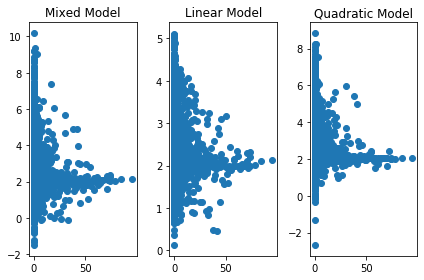

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# making plots
ax = plt.subplot(1, 3, 1)
ax.scatter(ys.yt,ys.yp1)
ax.set_title('Mixed Model')
ax = plt.subplot(1, 3, 2)
ax.scatter(ys.yt,ys.yp2)
ax.set_title('Linear Model')
ax = plt.subplot(1, 3, 3)
ax.scatter(ys.yt,ys.yp3)
ax.set_title('Quadratic Model')
plt.tight_layout()
plt.show()

In [18]:
print(ys.shape)
print(ys.describe())

# RMSE
from sklearn.metrics import mean_squared_error

print('')
print('Root Mean Squared Error')
print(mean_squared_error(ys.yt,ys.yp1))
print(mean_squared_error(ys.yt,ys.yp2))
print(mean_squared_error(ys.yt,ys.yp3))

# Corr
print('')
print('Correlation Coefficient')
print(ys.corr())

(8315, 4)
                yt          yp1          yp2          yp3
count  8315.000000  8315.000000  8315.000000  8315.000000
mean      2.206975     2.233757     2.209609     2.273962
std       6.497786     0.827404     0.493738     0.709088
min       0.000000    -1.490331     0.135869    -2.669819
25%       0.000000     1.974000     1.974878     2.036353
50%       0.000000     2.059352     2.035079     2.059622
75%       1.500000     2.237624     2.308556     2.199667
max      95.000000    10.176270     5.115210     8.829234

Root Mean Squared Error
43.316858005667314
42.83688004052379
43.04054549707768

Correlation Coefficient
           yt       yp1       yp2       yp3
yt   1.000000 -0.038644 -0.058759 -0.034422
yp1 -0.038644  1.000000  0.667822  0.860030
yp2 -0.058759  0.667822  1.000000  0.529350
yp3 -0.034422  0.860030  0.529350  1.000000


It seems GLM with PCA didn't perform well.

## Precipitation in log scale

In [20]:
log_y_train = np.log(y_train.reset_index(drop=True)+1)
log_y_test = np.log(y_test.reset_index(drop=True)+1)

mod1 = linear_model.LinearRegression()
mod2 = linear_model.LinearRegression()
mod3 = linear_model.LinearRegression()

mod1.fit(x, log_y_train)
mod2.fit(x1, log_y_train)
mod3.fit(x2, log_y_train)

log_yp1 = mod1.predict(x_test.fillna(0.).reset_index(drop=True))
log_yp2 = mod2.predict(x_test.iloc[:,:30].fillna(0.).reset_index(drop=True))
log_yp3 = mod3.predict(x_test.iloc[:,30:].fillna(0.).reset_index(drop=True))

log_ys = pd.DataFrame({'yt':log_y_test, 'yp1':log_yp1, 'yp2': log_yp2, 'yp3':log_yp3})
ys2 = pd.DataFrame({'yt':y_test.reset_index(drop=True), 'yp1':(np.exp(log_yp1)-1.0), 'yp2': (np.exp(log_yp2)-1.0), 'yp3':(np.exp(log_yp3)-1.0)})

print(log_ys.describe())
print(ys2.describe())

                yt          yp1          yp2          yp3
count  8315.000000  8315.000000  8315.000000  8315.000000
mean      0.558956     0.576716     0.575054     0.581732
std       0.870932     0.106218     0.078786     0.075765
min       0.000000    -0.057697     0.071759    -0.020710
25%       0.000000     0.544800     0.543156     0.555312
50%       0.000000     0.555197     0.555153     0.560091
75%       0.916291     0.597149     0.600667     0.589515
max       4.564348     1.375536     0.975198     1.202342
                yt          yp1          yp2          yp3
count  8315.000000  8315.000000  8315.000000  8315.000000
mean      2.206975     0.790879     0.782839     0.794567
std       6.497786     0.211871     0.144662     0.149011
min       0.000000    -0.056064     0.074396    -0.020497
25%       0.000000     0.724264     0.721432     0.742485
50%       0.000000     0.742284     0.742208     0.750831
75%       1.500000     0.816932     0.823335     0.803113
max      95.00

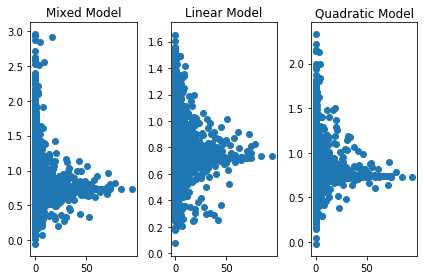

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# making plots
ax = plt.subplot(1, 3, 1)
ax.scatter(ys2.yt,ys2.yp1)
ax.set_title('Mixed Model')
ax = plt.subplot(1, 3, 2)
ax.scatter(ys2.yt,ys2.yp2)
ax.set_title('Linear Model')
ax = plt.subplot(1, 3, 3)
ax.scatter(ys2.yt,ys2.yp3)
ax.set_title('Quadratic Model')
plt.tight_layout()
plt.show()

In [22]:
# Corr
print('')
print('Correlation Coefficient')
print(log_ys.corr())

# Corr
print('')
print('Correlation Coefficient')
print(ys2.corr())


Correlation Coefficient
           yt       yp1       yp2       yp3
yt   1.000000 -0.060140 -0.068989 -0.045134
yp1 -0.060140  1.000000  0.779821  0.743203
yp2 -0.068989  0.779821  1.000000  0.432061
yp3 -0.045134  0.743203  0.432061  1.000000

Correlation Coefficient
           yt       yp1       yp2       yp3
yt   1.000000 -0.047110 -0.065241 -0.035052
yp1 -0.047110  1.000000  0.762758  0.764762
yp2 -0.065241  0.762758  1.000000  0.447923
yp3 -0.035052  0.764762  0.447923  1.000000
